<a href="https://colab.research.google.com/github/adriancm16/Machine_Learning/blob/main/perceptron/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **El Perceptrón**
Entrenamiento de un perceptron con funciones de activacion sigmoide y tangente hiperbolica


https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/



In [ ]:
#Librerías
from numpy import exp, array, random, dot
import seaborn as sns
import matplotlib.pyplot as plt

###Definición del Perceptrón

In [ ]:

#Perceptrón
class NeuralNetwork():
    def __init__(self):
        # Inicializar la semilla del generador aleatorio para que siempre de los mismos numeros
        # cada vez que el programa corra
        random.seed(1)

        # Modelo de una sola neurona, con una conexion de salida y tres de entrada.
        # asignamos pesos aleatorios a una matriz 3 x 1, con los valores en el rango -1 a 1
        # y media 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1#pesos para sigmoide

    # La función sigmoidea, que describe una función en forma de s, es la función de activación.
    # Nosotros hacemos pasar la suma de los pesos a través de dicha función para normalizarla entre 0 y 1--
    #(porque eso es lo que esperamos) y así poder dar un resultado
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # La derivada de la función sigmoidea
    # es el gradiente descendiente de la función sigmoidea
    # Indica qué tanto "le creemos" a los pesos resultantes, revisar link.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Ajustamos los pesos sinápticos en cada iteración
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        global historial_error#almacena el historial de los errores para graficarlos

        historial_error=[]#limpia el historial para proxima visualizacion

        for iteration in range(number_of_training_iterations):
            # Pasamos el conjunto de entrenamiento a través de la red neuronal (una única neurona).
            output = self.think(training_set_inputs)

            # Calculamos el error (La diferencia entre el valor que esperamos obtener realmente
            # y la salida predicha).
            error = training_set_outputs - output

            historial_error.append(sum(error))#agrega nuevo error al historial

            # Multiplique el error por la entrada y de nuevo por el gradiente descendiente de la función sigmoidea.
            # Esto significa que los pesos menos confiables se ajustan más (filtrado)
            # Esto significa que las entradas, que son cero, no causan cambio a los pesos.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Ajustar los pesos.
            self.synaptic_weights += adjustment*alpha

    #Proceso de aprendizaje de la red neuronal:
    def think(self, inputs):
        # Pasamos las entradas a través de la red neuronal (una única neurona).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))

    #Funcion de normalizacion
    def normalize(self,inference):#rango del sigmoide es de 0 a 1 por tanto : <0.5-->0, >=0.5-->1
      if inference >= 0.5:
        return 1
      else:
        return 0

###Clase Principal

In [ ]:
#Clase principal
if __name__ == "__main__":

    #Inicialice una red neuronal de una sola neurona. Quizas no sea propiamente una red...
    neural_network = NeuralNetwork()

    print ("Pesos sinapticos iniciales generados aleatoriamente: ")
    print (neural_network.synaptic_weights)

    # El conjunto de entrenamiento. Tenemos 4 ejemplos, cada uno consistente de tres valores de entrada
    #con su respectiva salida (una salida)
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T

    #TASA DE APRENDIZAJE Y EPOCAS
    alpha = 0.2 #Tasa de Aprendizaje
    number_of_training_iterations = 500 #Numero de épocas: numero de iteraciones .

    #----------------ENTRENAMIENTO-----
    # Entrene a la red neuronal usando un conjunto de entrenamiento.
    # lo iteramos epocs veces, haciendo pequeños ajustes de pesos en cada iteración
    neural_network.train(training_set_inputs, training_set_outputs, number_of_training_iterations)
    print ("\nNuevos pesos sinapticos después del entremaniento: ")
    print (neural_network.synaptic_weights)

    print("\nUltimo error: "+str(historial_error[-1]))#visualiza ultimo error al trancurrir todas las épocas

    # Pruebe la red neuronal con una situacion desconocida.
    test = array([1, 0, 0])
    print ("\nConsiderando las entradas: ")
    print (test)

    print("\n---------------------------------------------")
    output_test=neural_network.think(test)
    print("Resultado del test---> ",output_test)
    print("Resultado Normalizada---> ",neural_network.normalize(output_test))


Pesos sinapticos iniciales generados aleatoriamente: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]

Nuevos pesos sinapticos después del entremaniento: 
[[ 4.6084726 ]
 [-0.20128523]
 [-2.08800584]]

Ultimo error: [-0.03834186]

Considerando las entradas: 
[1 0 0]

---------------------------------------------
Resultado del test--->  [0.99013133]
Resultado Normalizada--->  1


GRAFICA DEL ERROR

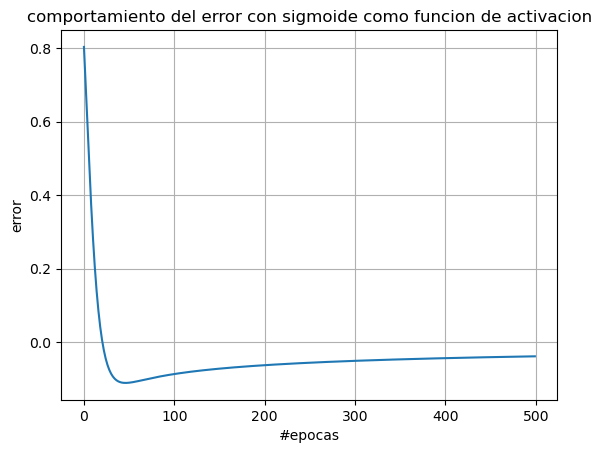

In [ ]:
#configuracion de los ejes
plt.title("comportamiento del error con sigmoide como funcion de activacion")
plt.ylabel("error")
plt.xlabel("#epocas")

#datos de errores
plt.plot(historial_error)
plt.grid()
plt.show()


## PERCEPTRON POR TANH

In [ ]:
#Perceptrón
class NeuralNetwork_tanh():
    def __init__(self):

        random.seed(1)
        self.synaptic_weights = 2 * random.random((3, 1)) - 1#pesos para tanh

    #funcion tanh
    def __tanh(self, x):
        return (2/(1 + exp(-2*x)))-1

    # derivada tanh
    def __tanh_derivative(self, x):
        return 1-((2/(1 + exp(-2*x)))-1)**2

    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Ajustamos los pesos sinápticos en cada iteración
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        global historial_error#historial de error para visualizar en gráfica

        historial_error=[]#limpia el historial para proxima visualizacion

        for iteration in range(number_of_training_iterations):
            # Pasamos el conjunto de entrenamiento a través de la red neuronal (una única neurona).
            output = self.thinkt(training_set_inputs)

            # Calculamos el error (La diferencia entre el valor que esperamos obtener realmente
            # y la salida predicha).
            error = training_set_outputs - output

            historial_error.append(sum(error))

            # Multiplique el error por la entrada y de nuevo por el gradiente descendiente de la función tanh.
            # Esto significa que los pesos menos confiables se ajustan más (filtrado)
            # Esto significa que las entradas, que son cero, no causan cambio a los pesos.
            adjustment = dot(training_set_inputs.T, error * self.__tanh_derivative(output))

            # Ajustar los pesos.
            self.synaptic_weights += adjustment*alpha

    #Proceso de aprendizaje de la red neuronal:
    def thinkt(self, inputs):
        # Pasamos las entradas a través de la red neuronal (una única neurona).
        return self.__tanh(dot(inputs, self.synaptic_weights))

    #Funcion de normalizacion
    def normalize(self,inference):#rango del tanh es -1,1 por tanto: <0 -->0, >=0 -->1
      if inference >= 0:
        return 1
      else:
        return 0

Principal

Pesos sinapticos iniciales generados aleatoriamente: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]

Nuevos pesos sinapticos después del entremaniento: 
[[ 2.66222333e+00]
 [-7.40757410e-05]
 [ 4.16958443e-03]]

Ultimo error: [0.01100088]

Considerando las entradas: 
[1 0 0]

---------------------------------------------
Resultado del test--->  [0.99030513]
Resultado Normalizada--->  1


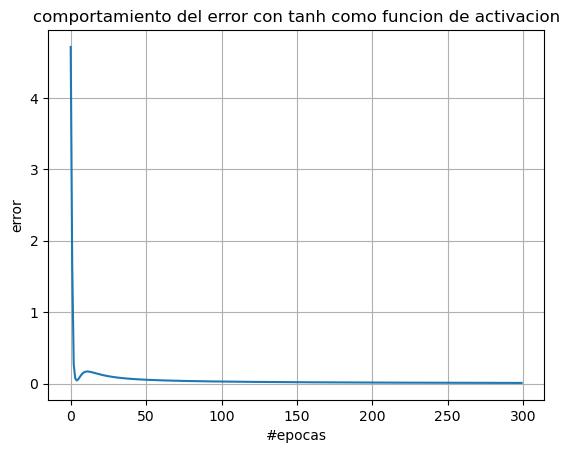

In [ ]:
if __name__ == "__main__":

    neural_network_tanh = NeuralNetwork_tanh()

    print ("Pesos sinapticos iniciales generados aleatoriamente: ")
    print (neural_network_tanh.synaptic_weights)

    # El conjunto de entrenamiento. Tenemos 4 ejemplos, cada uno consistente de tres valores de entrada
    #con su respectiva salida (una salida)
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T

    #TASA DE APRENDIZAJE Y EPOCAS
    alpha = 0.2 #Tasa de Aprendizaje
    number_of_training_iterations = 300#Numero de épocas: numero de iteraciones .

    #----------------ENTRENAMIENTO-----
    # Entrene a la red neuronal usando un conjunto de entrenamiento.
    # lo iteramos epocs veces, haciendo pequeños ajustes de pesos en cada iteración
    neural_network_tanh.train(training_set_inputs, training_set_outputs, number_of_training_iterations)
    print ("\nNuevos pesos sinapticos después del entremaniento: ")
    print (neural_network_tanh.synaptic_weights)

    print("\nUltimo error: "+str(historial_error[-1]))#visualiza ultimo error

    # Pruebe la red neuronal con una situacion desconocida.
    test = array([1, 0, 0])
    print ("\nConsiderando las entradas: ")
    print (test)

    print("\n---------------------------------------------")
    output_test=neural_network_tanh.thinkt(test)
    print("Resultado del test---> ",output_test)
    print("Resultado Normalizada---> ",neural_network_tanh.normalize(output_test))

##GRAFICA
#configuracion de los ejes
plt.title("comportamiento del error con tanh como funcion de activacion")
plt.ylabel("error")
plt.xlabel("#epocas")

#datos de errores
plt.plot(historial_error)
plt.grid()
plt.show()
